# A/B Testing

### Dataset used - Mobile Game Cookie Cats


## Variables in the dataset:

- userid: A unique number that identifies each player.
- version: Whether the player was put in the control group (gate_30 - a gate at level 30) or the group with the moved gate (gate_40 - a gate at level 40).
- sum_gamerounds: The number of game rounds played by the player during the first 14 days after install.
- retention_1: Did the player come back and play 1 day after installing?
- retention_7: Did the player come back and play 7 days after installing?

When a player installed the game, he or she was randomly assigned to either gate_30 or gate_40. In this project, I will perform A/B test to see if there are any benefits where the first gate in Cookie Cats was moved from level 30 to level 40.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu

import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv('cookie_cats.csv')

In [3]:
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [4]:
df.shape

(90189, 5)

In [5]:
df.isnull().sum()

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

In [6]:
df.describe()

,userid,sum_gamerounds
count,9.018900e+04,90189.000000
mean,4.998412e+06,51.872457
std,2.883286e+06,195.050858
min,1.160000e+02,0.000000
25%,2.512230e+06,5.000000
50%,4.995815e+06,16.000000
75%,7.496452e+06,51.000000
max,9.999861e+06,49854.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [8]:
df['version'].value_counts()

gate_40    45489
gate_30    44700
Name: version, dtype: int64

In [9]:
df['version'].value_counts(normalize = True)

gate_40    0.504374
gate_30    0.495626
Name: version, dtype: float64

Text(0, 0.5, '# or People')

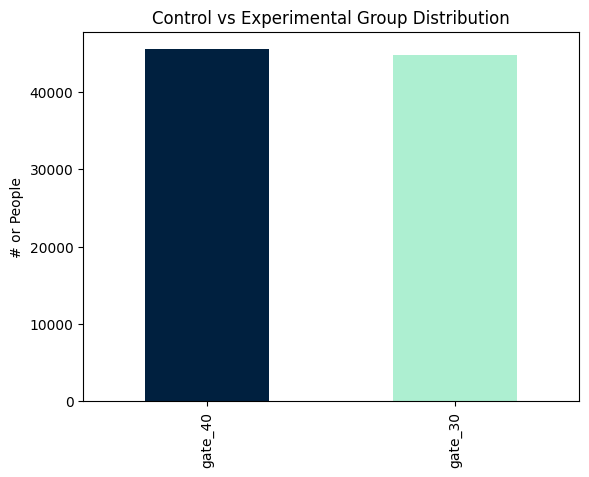

In [10]:
df['version'].value_counts().plot(kind = 'bar',color=[  "#00203FFF", "#ADEFD1FF"])
plt.title('Control vs Experimental Group Distribution')
plt.ylabel("# or People")

# Sum of Game Rounds

Text(0.5, 1.0, 'Mean Gamerounds for Control vs Experiment Groups')

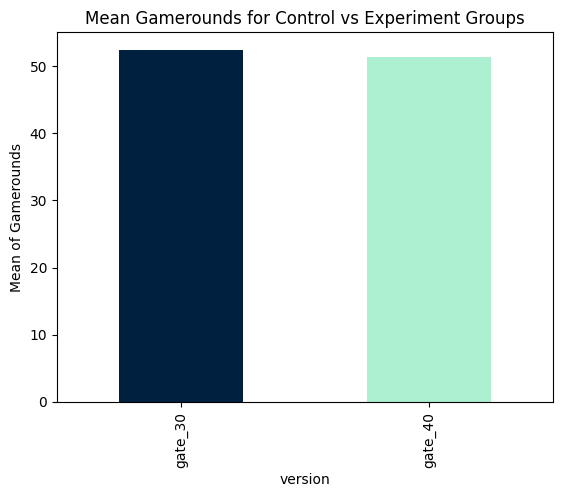

In [11]:
df.groupby(['version'])['sum_gamerounds'].mean().plot(kind = 'bar', color=[ "#00203FFF", "#ADEFD1FF"])
plt.ylabel("Mean of Gamerounds")
plt.title('Mean Gamerounds for Control vs Experiment Groups')

<AxesSubplot: ylabel='Frequency'>

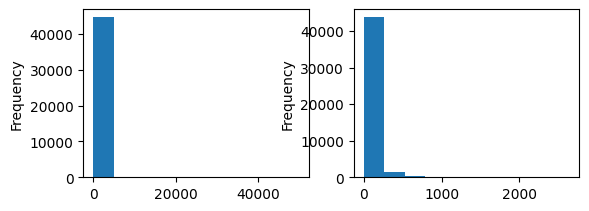

In [12]:
plt.subplot(221)
df[df['version'] == 'gate_30']['sum_gamerounds'].plot(kind = 'hist')

plt.subplot(222)
df[df['version'] == 'gate_40']['sum_gamerounds'].plot(kind = 'hist')

Text(0.5, 1.0, 'Box Plot to Identify Outliers')

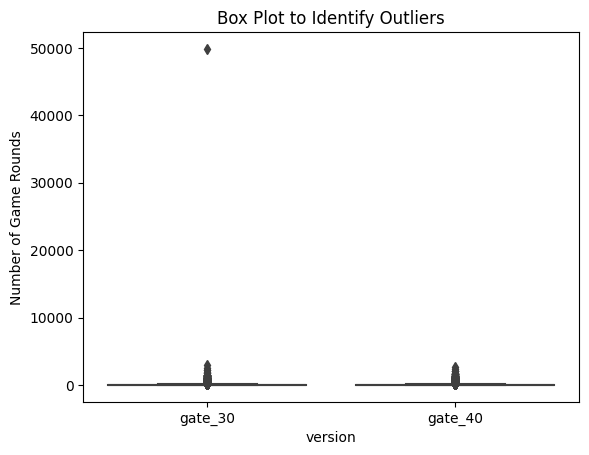

In [13]:
sns.boxplot(data=df, x="version", y="sum_gamerounds")
plt.ylabel('Number of Game Rounds')
plt.title('Box Plot to Identify Outliers')

## From the boxplot, we see that there are clear outliers, we will remove them using interquartile range method.

### We will remove values based on 1.5 * (99th percentile - 1st percentile)

# Removing Outliers using IQR

In [14]:
q1 = np.percentile(df['sum_gamerounds'], 1)
q99 = np.percentile(df['sum_gamerounds'], 99)
iqr = q99 - q1
cut_off = 1.5*iqr
print('Interquartile Range: ', iqr)
print('Cutoff: ', cut_off)

Interquartile Range:  493.0
Cutoff:  739.5


In [15]:
upper_cutoff = q99 + 1.5 * iqr
lower_cutoff = q1 - 1.5 * iqr

print('Upper cutoff: ', upper_cutoff)
print('Lower cutoff: ', lower_cutoff)

Upper cutoff:  1232.5
Lower cutoff:  -739.5


In [16]:
df_final = df[(df['sum_gamerounds']<=upper_cutoff) & (df['sum_gamerounds']>=lower_cutoff)]
df_final.shape

(90128, 5)

In [17]:
df_final.describe()

,userid,sum_gamerounds
count,9.012800e+04,90128.000000
mean,4.998793e+06,50.309637
std,2.883142e+06,94.468697
min,1.160000e+02,0.000000
25%,2.512420e+06,5.000000
50%,4.996498e+06,16.000000
75%,7.496498e+06,51.000000
max,9.999861e+06,1230.000000


# Retention

In [18]:
print('Retention after 1 day for Control group:', np.round(df_final[df_final['version'] == 'gate_30']
      ['retention_1'].sum()/df_final[df_final['version'] == 'gate_30'].shape[0] * 100,2),'%')

print('Retention after 1 day for Treatment group:', np.round(df_final[df_final['version'] == 'gate_40']
      ['retention_1'].sum()/df_final[df_final['version'] == 'gate_40'].shape[0] * 100,2),'%')


Retention after 1 day for Control group: 44.78 %
Retention after 1 day for Treatment group: 44.19 %


In [19]:
print('Retention after 7 day for Control group:', np.round(df_final[df_final['version'] == 'gate_30']
      ['retention_7'].sum()/df_final[df_final['version'] == 'gate_30'].shape[0] * 100,2),'%')

print('Retention after 7 day for Treatment group:', np.round(df_final[df_final['version'] == 'gate_40']
      ['retention_7'].sum()/df_final[df_final['version'] == 'gate_40'].shape[0] * 100,2),'%')


Retention after 7 day for Control group: 18.97 %
Retention after 7 day for Treatment group: 18.15 %


# Shapiro Normality Test

- H0 (Null hypothesis) - Distribution is normal
- H1 (Alternate hypothesis) - Distribution is not normal

In [20]:
def normality(gate):
    test_stat, pvalue = shapiro(df_final.loc[df["version"] == gate, "sum_gamerounds"])
    print('Test Stat = %.5f, p-value = %.5f' % (test_stat, pvalue))
    if pvalue<0.05:
        print('Not normally distributed')
    else:
        print('Normally distributed')
    return

In [21]:
print("Normality test got Gate 30:")
normality('gate_30')

Normality test got Gate 30:
Test Stat = 0.53334, p-value = 0.00000
Not normally distributed


In [22]:
print("Normality test got Gate 40:")
normality('gate_40')

Normality test got Gate 40:
Test Stat = 0.52674, p-value = 0.00000
Not normally distributed


### Since the p-value is less than 0.05 for both groups, we can reject the null hypothesis and conclude that the distribution is not normal

# Homegenity Test

- H0 (Null hypothesis) - Variance is homogeneous
- H1 (Alternate hypothesis) - Variance is not homogeneous

In [23]:
def homogenity(gate1, gate2):
    test_stat, pvalue = levene(df_final[df_final["version"] == gate1]["sum_gamerounds"], 
                               df_final[df_final["version"] == gate2]["sum_gamerounds"])
    print('Test Stat = %.5f, p-value = %.5f' % (test_stat, pvalue))
    if pvalue<0.05:
        print('Not Homeogenous')
    else:
        print('Homeogenous')
    return

In [24]:
print("Homogenity test:")
homogenity('gate_30', 'gate_40')

Homogenity test:
Test Stat = 0.04206, p-value = 0.83751
Homeogenous


### Since the p-value is greater than 0.05, we fail to reject the null hypothesis and conclude that it is homogeneous

### Since the null hypothesis for Levene test of homegenity is not rejected, we will perform non-parametric test

### On the other hand, 

- if we have found that the distributions are normal and the variances are homogeneous, we would have performed parametric test (T-test or Z-Test)

- if we have found that the distributions are normal and the variances are not homogeneous, we would have performed Welch test


# Non Parametric Test

- H0 (Null hypothesis) - There is no significant difference
- H1 (Alternate hypothesis) - There is significant difference

### Since the distribution is not Normal; we will perform Mann Whitney U Test (non-parametric test)

In [25]:
def mannwhitney(gate1, gate2):
    test_stat, pvalue = mannwhitneyu(df_final[df_final["version"] == gate1]["sum_gamerounds"], 
                               df_final[df_final["version"] == gate2]["sum_gamerounds"])
    print('Test Stat = %.5f, p-value = %.5f' % (test_stat, pvalue))
    if pvalue<0.05:
        print('There is significance between control and experiment groups')
    else:
        print('There is no significance between control and experiment groups')
    return

In [26]:
print('Mann Whitney U Test: ')
mannwhitney('gate_30', 'gate_40')

Mann Whitney U Test: 
Test Stat = 1022967070.00000, p-value = 0.04966
There is significance between control and experiment groups


### Since the p-value is less than 0.05, we reject the null hypothesis and conclude that there is significant difference between control and experimental groups

### Hence A/B groups are not similar. We can move the gate level from 30 to 40. 

## Reference:

- https://towardsdatascience.com/simple-and-complet-guide-to-a-b-testing-c34154d0ce5a